# Q3
## Part A


In [1]:
import numpy as np
from scipy.special import softmax
from autograd import grad
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from tqdm import tqdm
digits = load_digits()

In [2]:
class KclassLR:
    def __init__(self):
      pass
    def fit(self, X, Y):
        y_ = one_hot_encoder.fit_transform(Y.reshape(-1,1))
        weights = np.zeros((X.shape[1], y_.shape[1]))
        for i in range(1000):
            Z = np.dot(X,weights)
            soft_max = softmax(Z, axis=1)
            gradient = 1/X.shape[0] * (np.dot(X.T,(soft_max-y_)))
            weights= weights - 0.1*gradient
        self.weights=weights

    def predict(self,X):
        Z = np.dot(X,self.weights)
        soft_max = softmax(Z, axis=1)
        return np.argmax(soft_max, axis=1)

## Part B

In [3]:
import autograd.numpy as npy
from autograd import elementwise_grad

In [4]:
class KclassLR_b:
    def __init__(self):
      self.X=None
      self.y=None
      pass
    def loss(self,weights): 
        X = self.X
        y = self.y
        loss = 0
        for i in range(X.shape[0]):
            Z = npy.dot(X[i],weights)
            loss -= npy.log(npy.exp(npy.dot(X[i],weights[:,npy.argmax(y[i])]))/npy.sum(npy.exp(Z)))
        return loss/len(y)
        
    def fit(self, X, Y):
        y_ = one_hot_encoder.fit_transform(Y.reshape(-1,1))
        weights = npy.zeros((X.shape[1], y_.shape[1]))
        self.X=X
        self.y=y_
        gradient=grad(self.loss)
        for i in tqdm(range(100)):
            weights= weights - 0.1*gradient(weights)
        self.weights=weights

    def predict(self,X):
        Z = npy.dot(X,self.weights)
        soft_max = softmax(Z, axis=1)
        return np.argmax(soft_max, axis=1)

In [5]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
model = KclassLR_b()
x_train,x_test = x[:1500],x[1500:]
y_train,y_test = y[:1500],y[1500:]
model.fit(x_train,y_train)
y_hat=model.predict(x_test)
print(accuracy_score(y_test,y_hat))

100%|██████████| 100/100 [01:10<00:00,  1.41it/s]

0.898989898989899


## Part C

In [6]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))

In [7]:
kf3 = KFold(n_splits=3, shuffle=False)
for train_index, test_index in kf3.split(x):
    model = KclassLR()
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model.fit(x_train,y_train)
    y_hat=model.predict(x_test)
    print(accuracy_score(y_test,y_hat))

0.9248747913188647
0.9449081803005008
0.9048414023372288


In [8]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_hat)
print(confusion_mat)

[[56  0  0  0  1  1  1  0  0  0]
 [ 0 49  0  1  4  0  1  0  1  6]
 [ 0  0 60  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  2  0  2  7  0]
 [ 0  0  0  0 52  0  7  0  0  3]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  1  0  0  0  0 60  0  0  0]
 [ 0  1  0  0  1  0  0 56  1  2]
 [ 0  1  1  1  1  2  0  1 48  0]
 [ 2  0  0  2  0  2  0  0  0 52]]


## Part D

In [9]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.metrics import accuracy_score
digits = load_digits()
y = digits.target
x = digits.images.reshape((len(digits.images), -1))

In [11]:
x_train,x_test = x[:1500],x[1500:]
y_train,y_test = y[:1500],y[1500:]

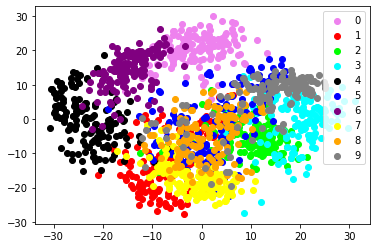

In [12]:
func = PCA(n_components=10)
x_pca = func.fit_transform(x_train)
colours = ['violet', 'red', 'lime', 'cyan','black', 'blue', 'purple', 'yellow',  'orange', 'gray']
for colour in range(len(colours)):
    x = x_pca[:, 0][y_train == colour]
    y = x_pca[:, 1][y_train == colour]
    plt.scatter(x, y, c=colours[colour])
plt.legend(digits.target_names)

# Q4

Learning Time Complexity = O(nd) where n is sample size, d is dimensions \\
Learning Space complexity = O(nd + n +d) \\
Prediction Space complexity = O(d) \\
Prediction Time Complexity = O(d)  

In [13]:
# Ref https://adataanalyst.com/machine-learning/principal-component-analysis-scikit-learn/
# Ref https://towardsdatascience.com/multiclass-logistic-regression-from-scratch-9cc0007da372
# Ref https://levelup.gitconnected.com/train-test-complexity-and-space-complexity-of-logistic-regression-2cb3de762054